# mfeat

In [1]:
import os
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

## Import dataset
### 1. mfeat-mor-left

In [2]:
path_to_data = os.path.join("UCI_datasets", "mfeat", 'mfeat-mor-left')

Reading each data file line by line

In [3]:
with open(path_to_data) as f:
    lines = [line.rstrip() for line in f]

In [4]:
mor_table = pd.DataFrame(columns=['class','mor1', 'mor2', 'mor3', 'mor4', 'mor5', 'mor6'])

In [5]:
for line in lines:
    temp_df = pd.DataFrame([[float(x) for x in line.split()]], columns=['mor1', 'mor2', 'mor3', 'mor4', 'mor5', 'mor6'])
    mor_table = mor_table.append(temp_df, ignore_index = True)

In [6]:
x = 0
while x <= 1600:
    a = x
    x += 160
    b = x
    mor_table.iloc[a:b,[0]] = x/160 - 1

In [7]:
mor_table['class'].value_counts()

9.0    160
8.0    160
7.0    160
6.0    160
5.0    160
4.0    160
3.0    160
2.0    160
1.0    160
0.0    160
Name: class, dtype: int64

In [8]:
mor_table = mor_table.astype({
    'class' : 'int8',    # category
#     'mor1': np.float32,
#     'mor2': np.float32,
#     'mor3': np.float32,
#     'mor4': np.float32,
#     'mor5': np.float32,
#     'mor6': np.float32
    })

In [9]:
mor_table.head()

,class,mor1,mor2,mor3,mor4,mor5,mor6
0,0,1.0,0.0,0.0,133.150861,1.311693,1620.221779
1,0,1.0,0.0,0.0,126.724861,1.302745,1609.334822
2,0,1.0,0.0,0.0,131.173861,1.319031,1568.978435
3,0,1.0,0.0,0.0,127.262861,1.329637,1647.720235
4,0,1.0,0.0,0.0,138.442861,1.379906,1918.750472


### 2. mfeat-zer-left

In [10]:
path_to_data = os.path.join("UCI_datasets", "mfeat", 'mfeat-zer-left')

Reading each data file line by line

In [11]:
with open(path_to_data) as f:
    lines = [line.rstrip() for line in f]

In [12]:
cols = []
for no in range(1, 48):
    cols.append('zer'+str(no))

In [13]:
zer_table = pd.DataFrame(columns=cols)

In [14]:
for line in lines:
    temp_df = pd.DataFrame([[float(x) for x in line.split()]], columns=cols)
    zer_table = zer_table.append(temp_df, ignore_index = True)

In [15]:
zer_table['class'] = pd.Series(0)

In [16]:
x = 0
while x <= 1600:
    a = x
    x += 160
    b = x
    zer_table.iloc[a:b,[47]] = x/160 - 1

In [17]:
zer_table = zer_table.astype({'class' : 'int8'})

In [18]:
zer_table['class'].value_counts()

9    160
8    160
7    160
6    160
5    160
4    160
3    160
2    160
1    160
0    160
Name: class, dtype: int64

### 3. mfeat-zer-left

In [19]:
path_to_data = os.path.join("UCI_datasets", "mfeat", 'mfeat-pix-left')

Reading each data file line by line

In [20]:
with open(path_to_data) as f:
    lines = [line.rstrip() for line in f]

In [21]:
cols = []
for no in range(1, 241):
    cols.append('zer'+str(no))

In [22]:
pix_table = pd.DataFrame(columns=cols)

In [23]:
for line in lines:
    temp_df = pd.DataFrame([[float(x) for x in line.split()]], columns=cols)
    pix_table = pix_table.append(temp_df, ignore_index = True)

In [24]:
pix_table['class'] = pd.Series(0)

In [25]:
x = 0
while x <= 1600:
    a = x
    x += 160
    b = x
    pix_table.iloc[a:b,[240]] = x/160 - 1

In [28]:
pix_table = pix_table.astype('int8')

In [30]:
pix_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Columns: 241 entries, zer1 to class
dtypes: int8(241)
memory usage: 376.7 KB


creating numpy array for image

In [93]:
x = 0
img = np.zeros((16, 15))
i = 0 
while x < 240:
    a = x
    x += 15
    b = x   
    img[i] = pix_table.iloc[369,a:b].values
    i += 1

## Data visualization

In [94]:
img

array([[0., 1., 4., 5., 6., 6., 6., 6., 5., 3., 3., 3., 0., 0., 0.],
       [1., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 6., 5., 1., 0.],
       [3., 6., 6., 6., 5., 2., 2., 4., 6., 6., 6., 6., 6., 5., 1.],
       [5., 6., 6., 6., 3., 0., 0., 0., 0., 1., 5., 6., 6., 6., 5.],
       [6., 6., 6., 6., 2., 0., 0., 0., 0., 0., 3., 6., 6., 6., 6.],
       [4., 6., 6., 3., 0., 0., 0., 0., 0., 0., 3., 6., 6., 6., 5.],
       [1., 4., 3., 0., 0., 0., 0., 0., 0., 1., 5., 6., 6., 4., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 3., 6., 6., 6., 5., 1., 0.],
       [0., 0., 0., 0., 0., 0., 3., 6., 6., 6., 6., 3., 0., 0., 0.],
       [0., 0., 0., 2., 4., 6., 6., 6., 6., 3., 1., 0., 0., 0., 0.],
       [0., 1., 5., 6., 6., 6., 6., 5., 1., 0., 0., 0., 0., 0., 0.],
       [2., 6., 6., 6., 6., 6., 3., 0., 0., 0., 0., 0., 0., 0., 0.],
       [5., 6., 6., 6., 6., 3., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [6., 6., 6., 6., 6., 6., 4., 2., 2., 2., 2., 2., 2., 1., 0.],
       [6., 6., 6., 6., 6., 6., 6.

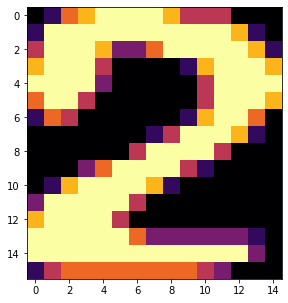

In [95]:
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111)

plt.imshow(img)


### Train model

### Model evaluation 